In [1]:
#!pip install scikit-learn pandas numpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# 1. Cargar el dataset desde OpenML
#    'credit-g' => German Credit Data
X, y = fetch_openml(name='credit-g', version=1, as_frame=True, return_X_y=True)

print("Dimensiones de X:", X.shape)
print("Primeras filas:\n", X.head())
print("Clases en y:", pd.Series(y).unique())

# 2. Analizar tipos de datos (numérico vs categórico)
#    - En este dataset, ciertas columnas son object/categorical.
#    - Otras son numéricas.
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()

print("Columnas categóricas:", cat_cols)
print("Columnas numéricas:", num_cols)

# 3. Definir un column transformer para:
#    - OneHotEncoder en las columnas categóricas
#    - (Opcional) Escalar las columnas numéricas con StandardScaler
column_transform = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), cat_cols),
    (StandardScaler(), num_cols),
    remainder='passthrough'  # Si hubiera columnas que no queremos transformar
)

# 4. Crear un pipeline que aplique las transformaciones y luego entrene un MLP
mlp_pipeline = make_pipeline(
    column_transform,
    MLPClassifier(hidden_layer_sizes=(16, 8),  # Ejemplo: 2 capas (16 y 8)
                  activation='relu',
                  solver='adam',
                  random_state=42,
                  max_iter=300)
)

# 5. Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Tamaño de entrenamiento: {X_train.shape}, prueba: {X_test.shape}")

# 6. Ajustar (fit) el pipeline en entrenamiento
mlp_pipeline.fit(X_train, y_train)

# 7. Predecir y evaluar
y_pred = mlp_pipeline.predict(X_test)

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))



Dimensiones de X: (1000, 20)
Primeras filas:
   checking_status  duration                  credit_history  \
0              <0         6  critical/other existing credit   
1        0<=X<200        48                   existing paid   
2     no checking        12  critical/other existing credit   
3              <0        42                   existing paid   
4              <0        24              delayed previously   

               purpose  credit_amount    savings_status employment  \
0             radio/tv           1169  no known savings        >=7   
1             radio/tv           5951              <100     1<=X<4   
2            education           2096              <100     4<=X<7   
3  furniture/equipment           7882              <100     4<=X<7   
4              new car           4870              <100     1<=X<4   

   installment_commitment     personal_status other_parties  residence_since  \
0                       4         male single          none               

c:\Users\MaoYeral\miniconda3\envs\ML_2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Dimensiones de X: (1000, 20)
Primeras filas:
   checking_status  duration                  credit_history  \
0              <0         6  critical/other existing credit   
1        0<=X<200        48                   existing paid   
2     no checking        12  critical/other existing credit   
3              <0        42                   existing paid   
4              <0        24              delayed previously   

               purpose  credit_amount    savings_status employment  \
0             radio/tv           1169  no known savings        >=7   
1             radio/tv           5951              <100     1<=X<4   
2            education           2096              <100     4<=X<7   
3  furniture/equipment           7882              <100     4<=X<7   
4              new car           4870              <100     1<=X<4   

   installment_commitment     personal_status other_parties  residence_since  \
0                       4         male single          none               

c:\Users\MaoYeral\miniconda3\envs\ML_2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


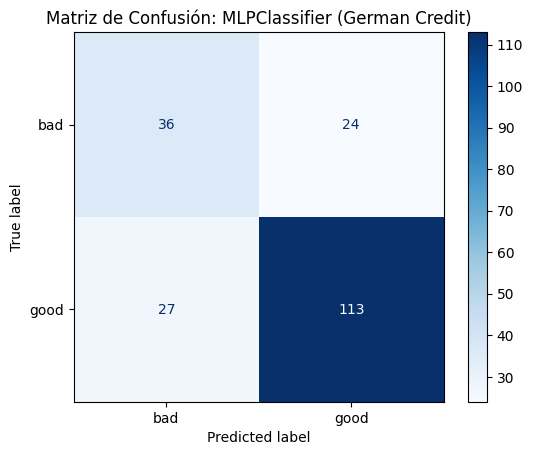

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# 1. Cargar el dataset desde OpenML
#    'credit-g' => German Credit Data
X, y = fetch_openml(name='credit-g', version=1, as_frame=True, return_X_y=True)

print("Dimensiones de X:", X.shape)
print("Primeras filas:\n", X.head())
print("Clases en y:", pd.Series(y).unique())

# 2. Analizar tipos de datos (numérico vs categórico)
#    - En este dataset, ciertas columnas son object/categorical.
#    - Otras son numéricas.
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()

print("Columnas categóricas:", cat_cols)
print("Columnas numéricas:", num_cols)

# 3. Definir un column transformer para:
#    - OneHotEncoder en las columnas categóricas
#    - (Opcional) Escalar las columnas numéricas con StandardScaler
column_transform = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), cat_cols),
    (StandardScaler(), num_cols),
    remainder='passthrough'  # Si hubiera columnas que no queremos transformar
)

# 4. Crear un pipeline que aplique las transformaciones y luego entrene un MLP
mlp_pipeline = make_pipeline(
    column_transform,
    MLPClassifier(hidden_layer_sizes=(16, 8),  # Ejemplo: 2 capas (16 y 8)
                  activation='relu',
                  solver='adam',
                  random_state=42,
                  max_iter=300)
)

# 5. Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Tamaño de entrenamiento: {X_train.shape}, prueba: {X_test.shape}")

# 6. Ajustar (fit) el pipeline en entrenamiento
mlp_pipeline.fit(X_train, y_train)

# 7. Predecir y evaluar
y_pred = mlp_pipeline.predict(X_test)

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))
# 8. Graficar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=mlp_pipeline.steps[-1][1].classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión: MLPClassifier (German Credit)")
plt.show()